# Feature Visualizations in CNNs

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

Set key parameters

In [2]:
batch_size=64
epochs=10
Img_height=150
Img_width=150

Perform data augmentation

In [3]:
train_image_generator=ImageDataGenerator(rescale=1/.255,
                                        rotation_range=45,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.3)

Validation Data

In [4]:
validation_image_generator=ImageDataGenerator(rescale=1/.255)

In [9]:
Train_path='dogs-vs-cats/dogs-vs-cats/train_data'
Val_path='dogs-vs-cats/dogs-vs-cats/Validation_data'

Generate the train and validation data

In [10]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory=Train_path,
                                                        shuffle=True,
                                                        target_size=(Img_height,Img_width),
                                                         class_mode='binary')

Found 200 images belonging to 2 classes.


In [11]:
val_data_gen=validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory=Val_path,
                                                        shuffle=True,
                                                        target_size=(Img_height,Img_width))

Found 40 images belonging to 2 classes.


Create the CNN + Classifier

In [12]:
model=Sequential([
    Conv2D(16,3,padding='same',activation='relu',
          input_shape=(Img_height,Img_width,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,5,padding='same',activation='relu',),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu',),
    MaxPooling2D(),    
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
trained_model=model.fit_generator(train_data_gen,
                                 epochs=epochs,
                                 validation_data=val_data_gen)

C:\Users\Rohit Sinha\AppData\Local\Temp\ipykernel_25164\3916894975.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model=model.fit_generator(train_data_gen,


Epoch 1/10
4/4 [==============================] - 5s 777ms/step - loss: 3830.6965 - accuracy: 0.5150 - val_loss: 160.7916 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 3s 627ms/step - loss: 206.9029 - accuracy: 0.5000 - val_loss: 2.9305 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 3s 636ms/step - loss: 34.4252 - accuracy: 0.5050 - val_loss: 57.0835 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 3s 694ms/step - loss: 40.6045 - accuracy: 0.5300 - val_loss: 9.8282 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 4s 858ms/step - loss: 7.3086 - accuracy: 0.5050 - val_loss: 5.4770 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 3s 882ms/step - loss: 3.1184 - accuracy: 0.5550 - val_loss: 1.3400 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 3s 903ms/step - loss: 2.8652 - accuracy: 0.5550 - val_loss: 3.4236 - val_accuracy: 0.5000
Epoch 8/10

# Feature Visualization

Visualizing the filters / feature detectors

16


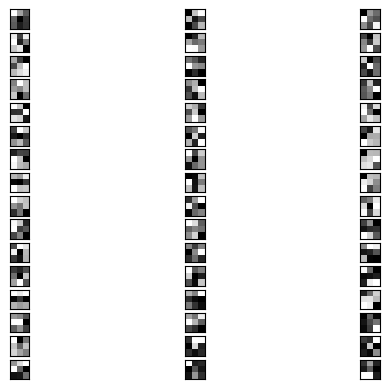

32


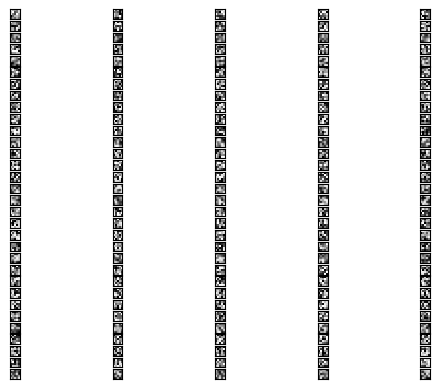

64


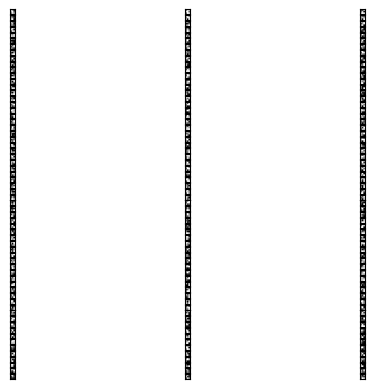

In [18]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights,bias=layer.get_weights()
        # normalize the weights
        f_min, f_max = weights.min(), weights.max()
        filters=(weights-f_min)/(f_max-f_min)
        print(filters.shape[3])
        filter_cnt=1
        #plot all filters
        for i in range(filters.shape[3]):
            filt=filters[:,:,:,i]
            for j in range(filters.shape[0]):
                ax=plt.subplot(filters.shape[3],filters.shape[0],filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,j],cmap='gray')
                filter_cnt+=1
        plt.show()

Feature Visualization

In [17]:
img_path='dogs-vs-cats/dogs-vs-cats/Validation_data/Dogs/1053.jpg' 
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, 
                                            outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)        

In [19]:
type(img)

PIL.Image.Image

In [20]:
img.size

(150, 150)

In [21]:
type(x)

numpy.ndarray

In [22]:
x.shape

(150, 150, 3)

In [23]:
x   = x.reshape((1,) + x.shape)

In [24]:
x.shape

(1, 150, 150, 3)

1/1 [==============================] - 0s 207ms/step
(1, 75, 75, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 64)


C:\Users\Rohit Sinha\AppData\Local\Temp\ipykernel_25164\2501523650.py:24: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


(1, 20736)
(1, 512)
(1, 1)


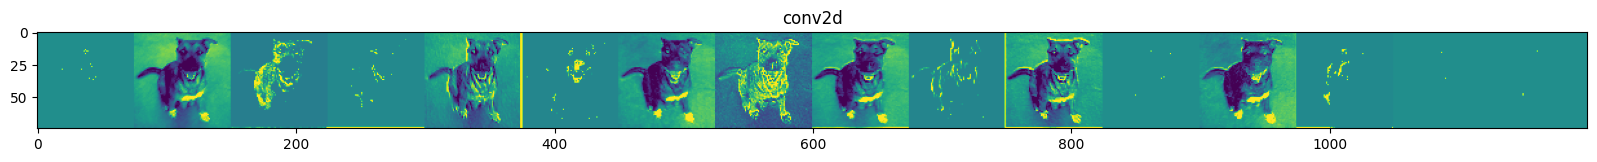

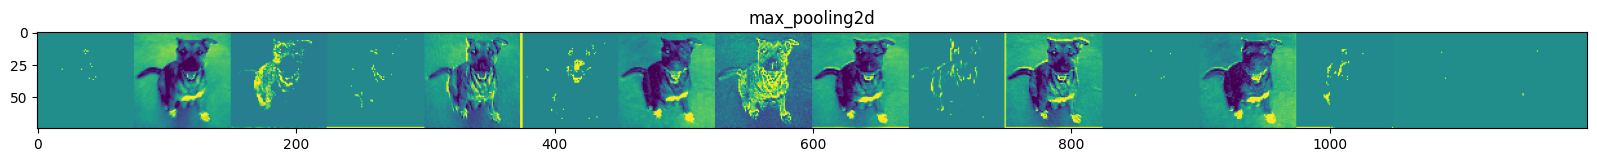

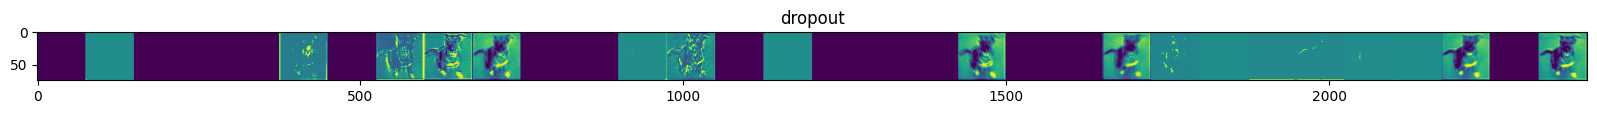

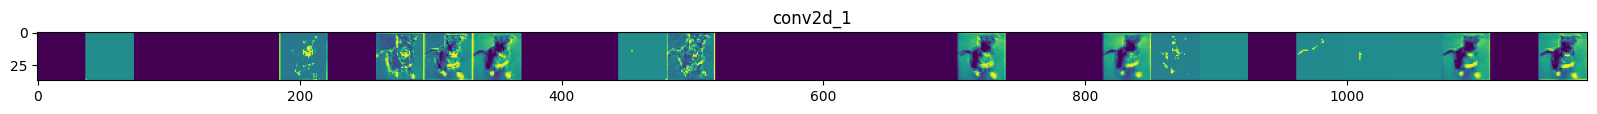

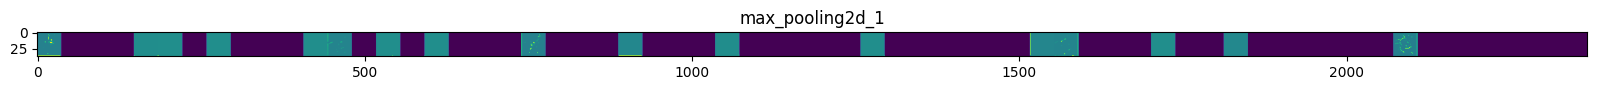

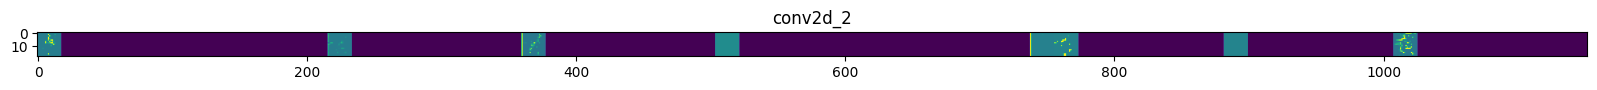

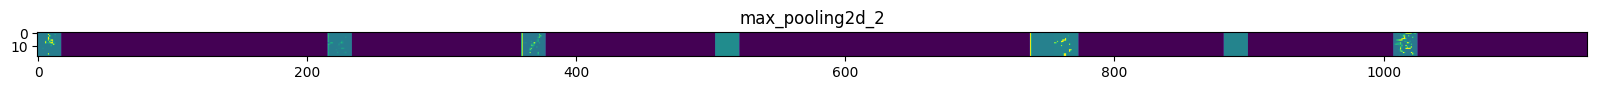

In [25]:
                   

# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )